<a href="https://colab.research.google.com/github/mfischer-ucl/prdpt/blob/main/examples/box_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2D Example: Optimize Box Position 

A simple example with a more lightweight renderer. Task: optimize the box position. 

The plateau here originates from the fact that the boxes in the initial configuration do not overlap. 

Set the algorithm parameters in the sliders below and run the last cell to start the optimization. 


In [1]:
!git clone https://github.com/mfischer-ucl/prdpt
!cd prdpt

Cloning into 'prdpt'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 82 (delta 27), reused 71 (delta 20), pack-reused 0
Unpacking objects: 100% (82/82), 2.73 MiB | 7.22 MiB/s, done.


In [1]:
#@title Set up renderer

import sys
import os 
sys.path.append(os.path.abspath('../'))
import torch
import functools
import numpy as np
import matplotlib.pyplot as plt 

device = 'cpu'
# os.chdir('prdpt') # uncomment for colab

from utils_fns import *
from utils_general import update_sigma_linear, run_scheduler_step, plt_errors, show_with_error


def get_rendering(theta, update_fn=None, ctx_args=None): 
  return draw_rect(theta[0], theta[1])


def draw_rect(px, py):   
  s, w, h, exp = 512, 0.07, 0.07, 10
  ss = torch.linspace(0, 1, s, device=device)
  x, y = torch.meshgrid(ss, ss)
  image = 1 - 2*(abs(((py - x)/w))**exp + abs((y - px)/h)**exp)
  return torch.flipud(image.clamp(0, 1)).unsqueeze(-1)


def render_smooth(perturbed_theta, update_fn, ctx_args):
  with torch.no_grad():
      imgs, losses = [], []
      for j in range(perturbed_theta.shape[0]):       # for each sample
          perturbed_img = get_rendering(perturbed_theta[j, :])
          perturbed_loss = torch.nn.MSELoss()(perturbed_img, ctx_args['gt_image'])
          imgs.append(perturbed_img)
          losses.append(perturbed_loss)
      avg_img = torch.mean(torch.cat([x.unsqueeze(0) for x in imgs], dim=0), dim=0)
      loss = torch.stack(losses)
  return loss, avg_img

In [10]:
#@title Set Algorithm Parameters { run: "auto", form-width: "25%", display-mode: "both" }
n_samples = 2 #@param {type:"slider", min:1, max:20, step:1}
sigma = 0.1 #@param {type:"slider", min:0.01, max:0.15, step:0.01}

hparams = {'nsamples': n_samples,
           'sigma': sigma,
           'learning_rate': 2e-3,
           'sigma_annealing': True,
           'epochs': 1000,
           'anneal_const_first': 200,
           'anneal_const_last': 0,
           'anneal_sigma_min': 0.05
           }

torch.manual_seed(0)
sigma = hparams['sigma']

# set up initial and gt translation:
theta = torch.tensor([0.5, 0.66], requires_grad=True, device=device)
gt_theta = torch.tensor([0.3, 0.33], device=device)

# set up optim:
optim = torch.optim.Adam([theta], lr=hparams['learning_rate'])

init_img = get_rendering(theta)
ref_img = get_rendering(gt_theta)

# set up ctx_args: 
ctx_args = {'antithetic': True, 'nsamples': hparams['nsamples'], 'sigma': hparams['sigma'],
            'sampler': 'importance', 'device': device, 'gt_image': ref_img, 'update_fn': None}

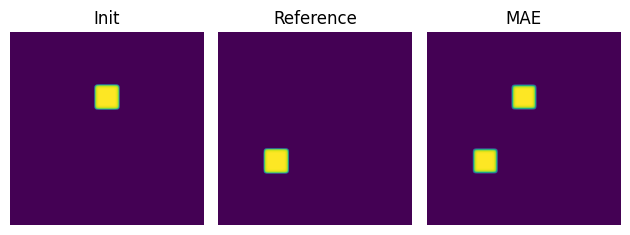

Iter 25/1000 - Img.Loss: 0.0254 - Param.Loss: 0.0640
Iter 50/1000 - Img.Loss: 0.0254 - Param.Loss: 0.0607


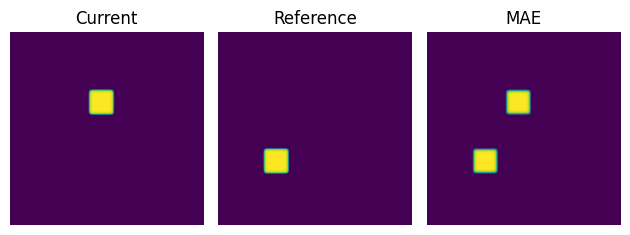

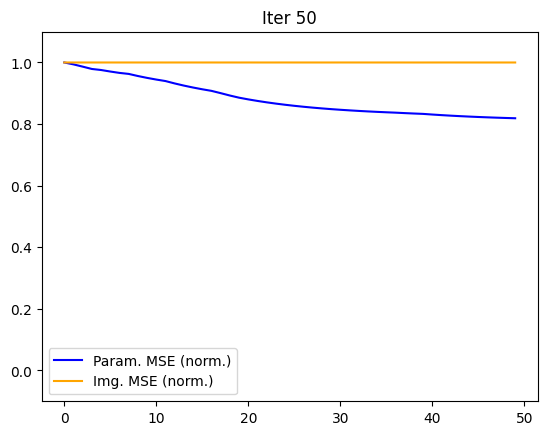

Iter 75/1000 - Img.Loss: 0.0254 - Param.Loss: 0.0591
Iter 100/1000 - Img.Loss: 0.0254 - Param.Loss: 0.0499


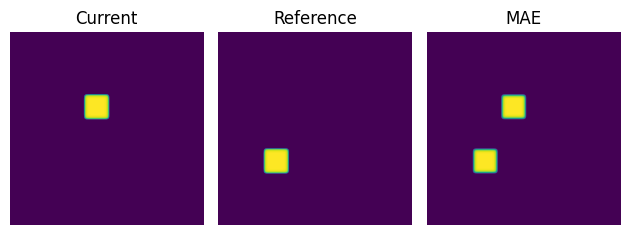

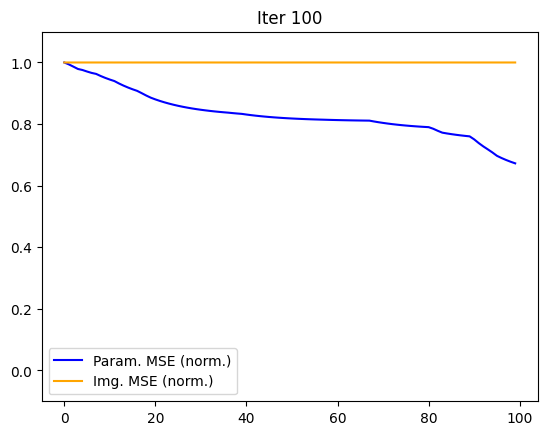

Iter 125/1000 - Img.Loss: 0.0254 - Param.Loss: 0.0433
Iter 150/1000 - Img.Loss: 0.0254 - Param.Loss: 0.0342


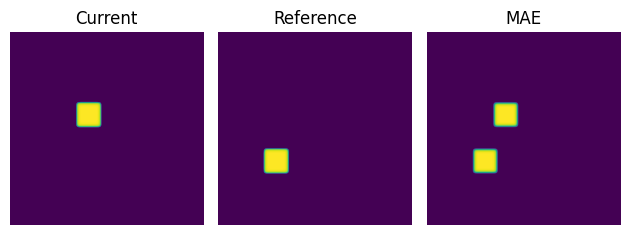

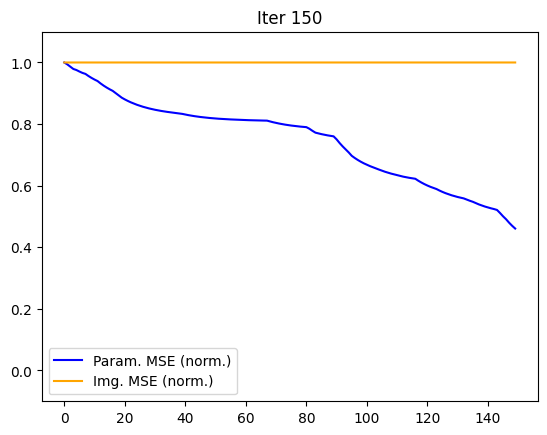

Iter 175/1000 - Img.Loss: 0.0254 - Param.Loss: 0.0197
Iter 200/1000 - Img.Loss: 0.0254 - Param.Loss: 0.0100


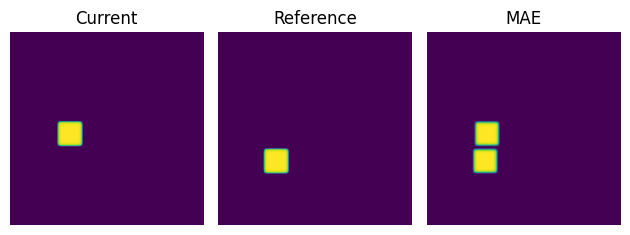

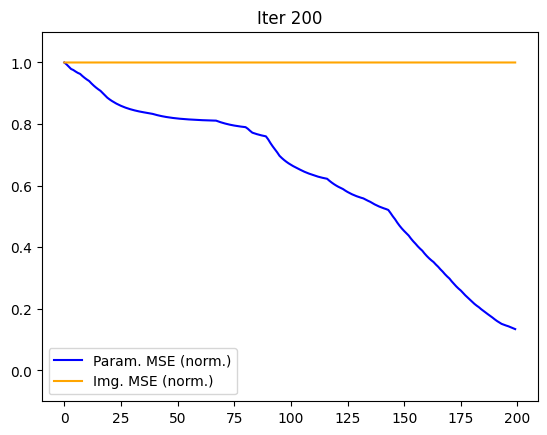

Iter 225/1000 - Img.Loss: 0.0184 - Param.Loss: 0.0038
Iter 250/1000 - Img.Loss: 0.0129 - Param.Loss: 0.0018


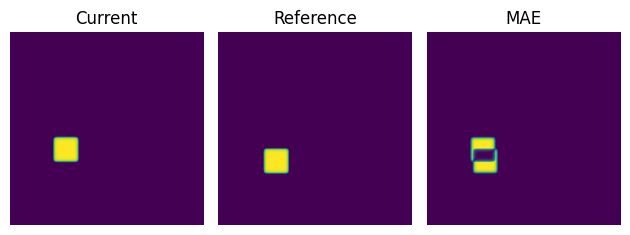

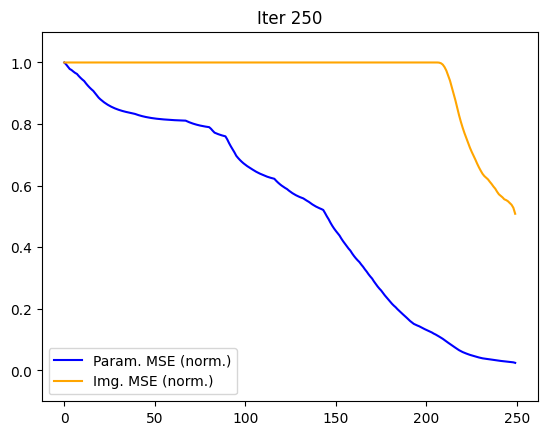

Iter 275/1000 - Img.Loss: 0.0053 - Param.Loss: 0.0004
Iter 300/1000 - Img.Loss: 0.0017 - Param.Loss: 0.0001


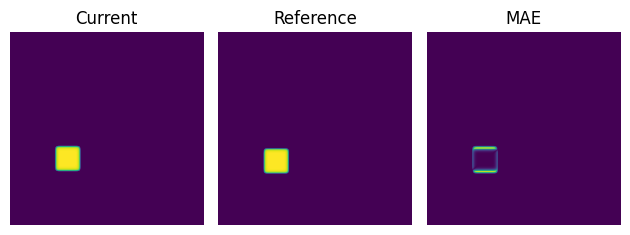

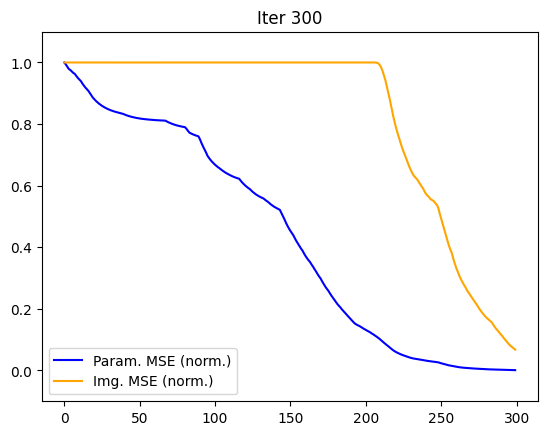

Iter 325/1000 - Img.Loss: 0.0006 - Param.Loss: 0.0000
Iter 350/1000 - Img.Loss: 0.0004 - Param.Loss: 0.0000


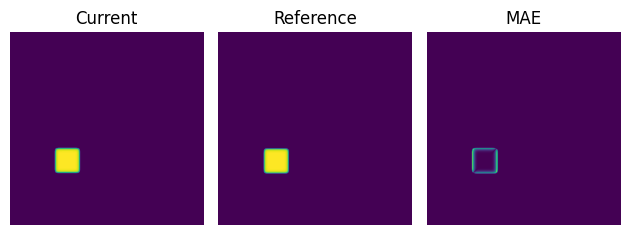

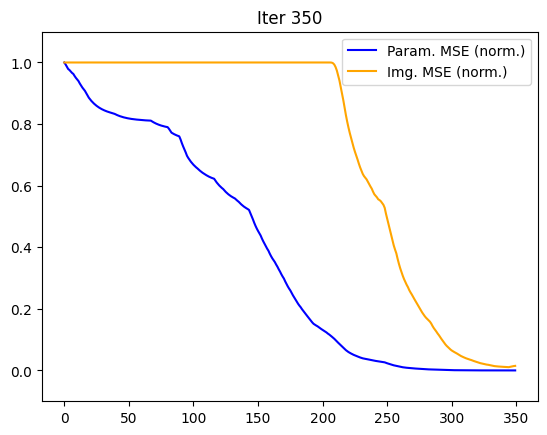

Iter 375/1000 - Img.Loss: 0.0006 - Param.Loss: 0.0000
Iter 400/1000 - Img.Loss: 0.0011 - Param.Loss: 0.0000


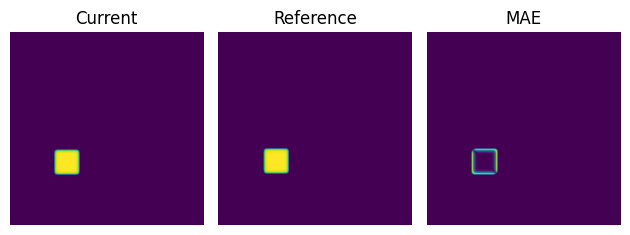

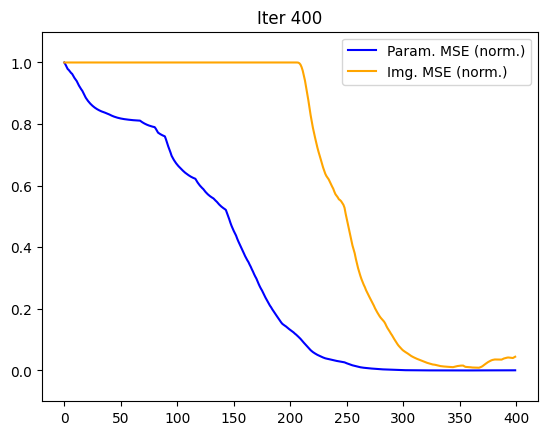

Iter 425/1000 - Img.Loss: 0.0006 - Param.Loss: 0.0000
Iter 450/1000 - Img.Loss: 0.0005 - Param.Loss: 0.0000


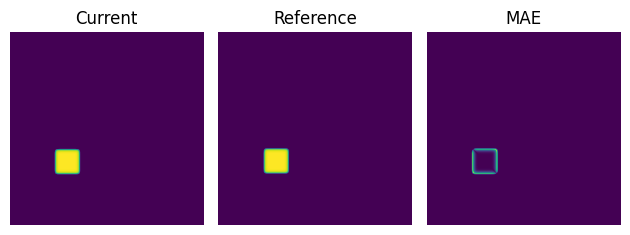

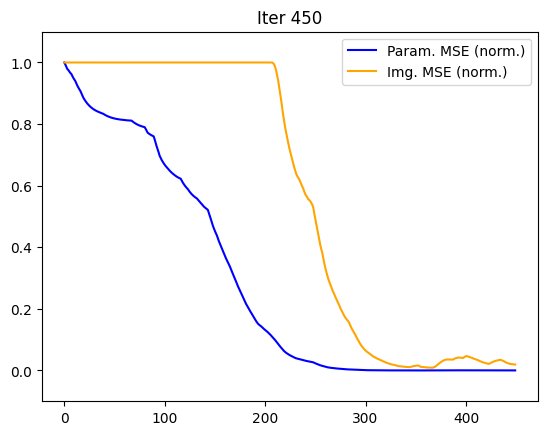

Iter 475/1000 - Img.Loss: 0.0008 - Param.Loss: 0.0000
Iter 500/1000 - Img.Loss: 0.0005 - Param.Loss: 0.0000


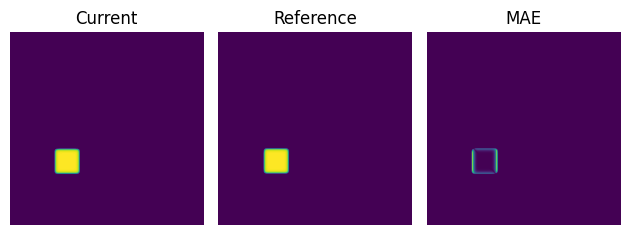

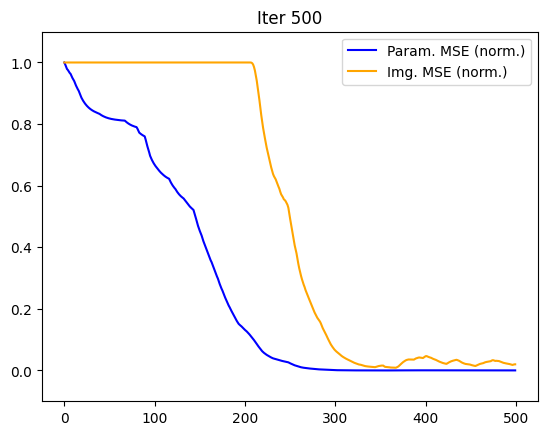

Iter 525/1000 - Img.Loss: 0.0002 - Param.Loss: 0.0000
Iter 550/1000 - Img.Loss: 0.0000 - Param.Loss: 0.0000


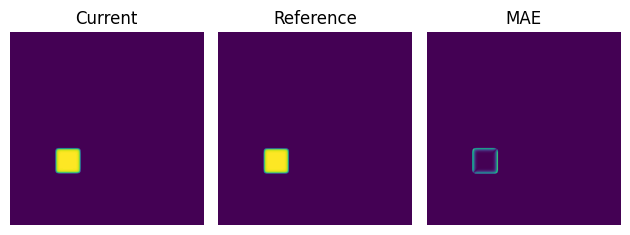

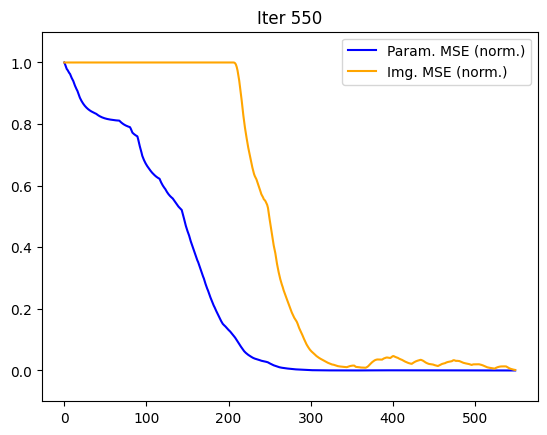

Iter 575/1000 - Img.Loss: 0.0008 - Param.Loss: 0.0000
Iter 600/1000 - Img.Loss: 0.0001 - Param.Loss: 0.0000


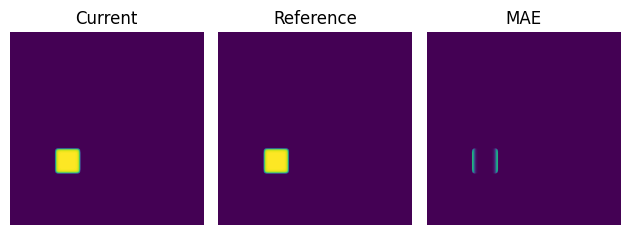

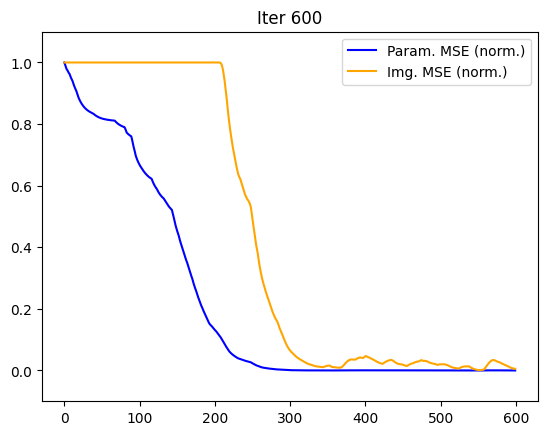

Iter 625/1000 - Img.Loss: 0.0002 - Param.Loss: 0.0000
Iter 650/1000 - Img.Loss: 0.0004 - Param.Loss: 0.0000


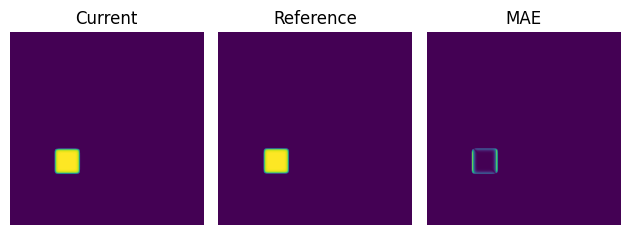

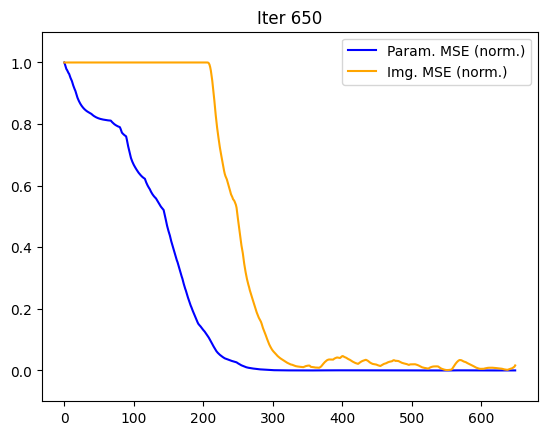

Iter 675/1000 - Img.Loss: 0.0008 - Param.Loss: 0.0000
Iter 700/1000 - Img.Loss: 0.0012 - Param.Loss: 0.0000


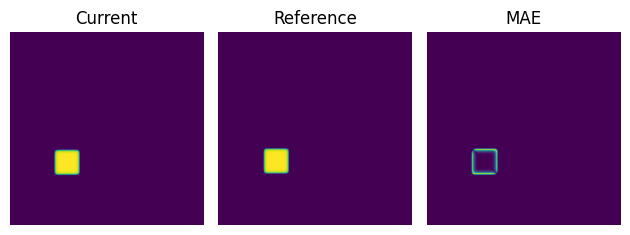

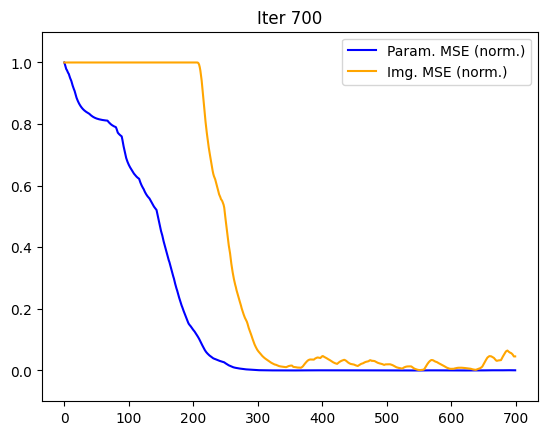

Iter 725/1000 - Img.Loss: 0.0000 - Param.Loss: 0.0000
Iter 750/1000 - Img.Loss: 0.0002 - Param.Loss: 0.0000


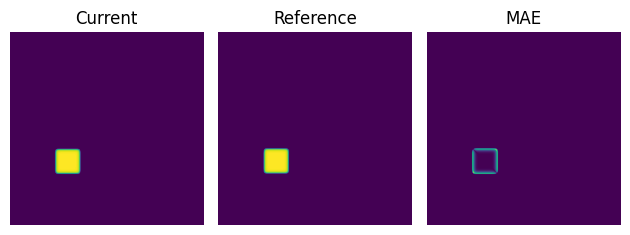

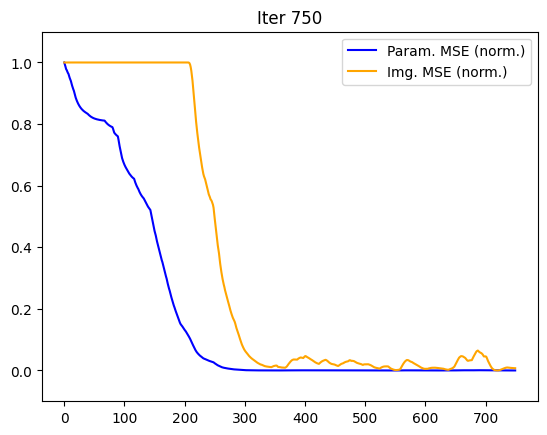

Iter 775/1000 - Img.Loss: 0.0007 - Param.Loss: 0.0000
Iter 800/1000 - Img.Loss: 0.0015 - Param.Loss: 0.0001


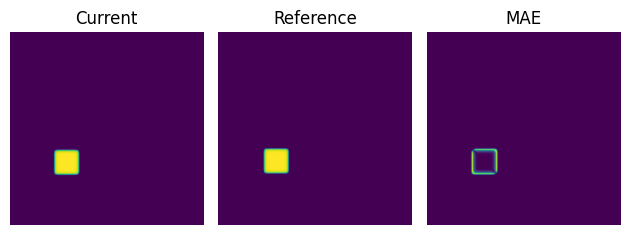

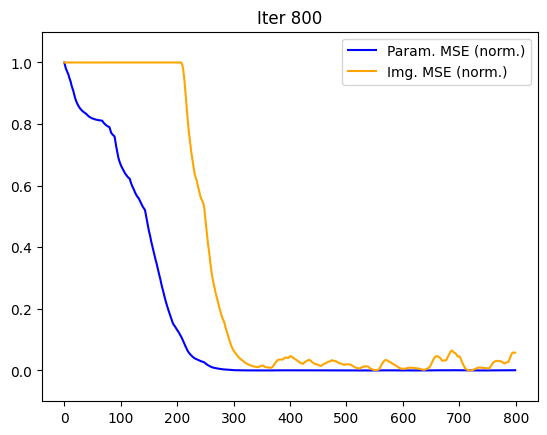

Iter 825/1000 - Img.Loss: 0.0006 - Param.Loss: 0.0000
Iter 850/1000 - Img.Loss: 0.0007 - Param.Loss: 0.0000


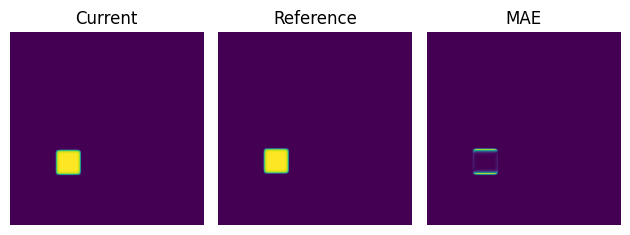

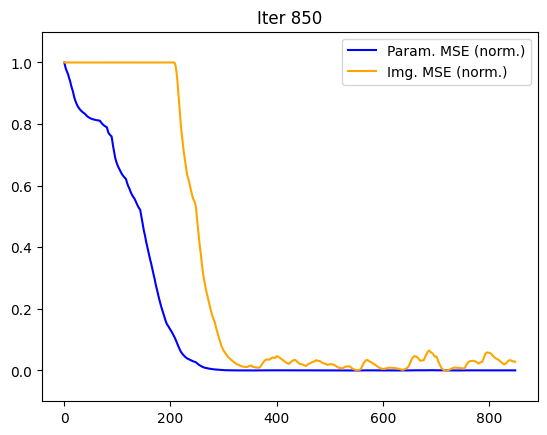

Iter 875/1000 - Img.Loss: 0.0007 - Param.Loss: 0.0000
Iter 900/1000 - Img.Loss: 0.0003 - Param.Loss: 0.0000


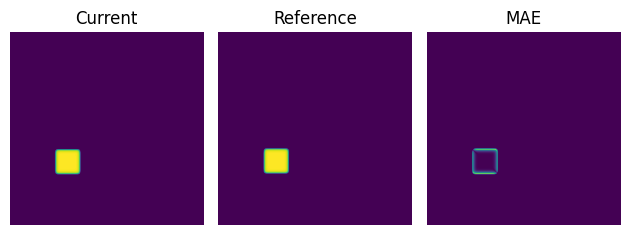

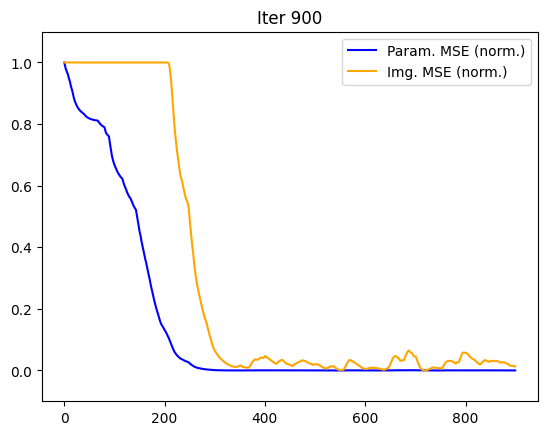

Iter 925/1000 - Img.Loss: 0.0003 - Param.Loss: 0.0000
Iter 950/1000 - Img.Loss: 0.0001 - Param.Loss: 0.0000


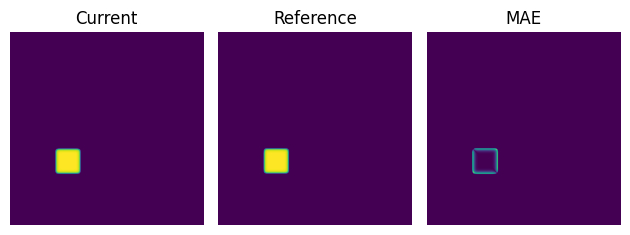

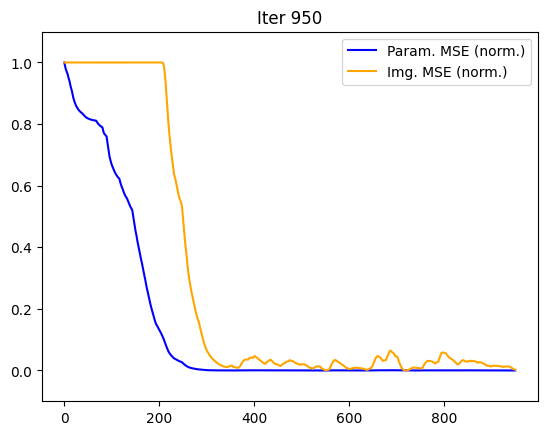

Iter 975/1000 - Img.Loss: 0.0003 - Param.Loss: 0.0000
Iter 1000/1000 - Img.Loss: 0.0002 - Param.Loss: 0.0000


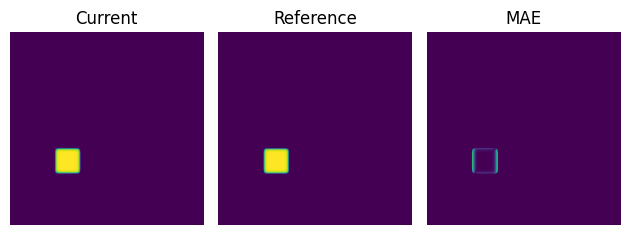

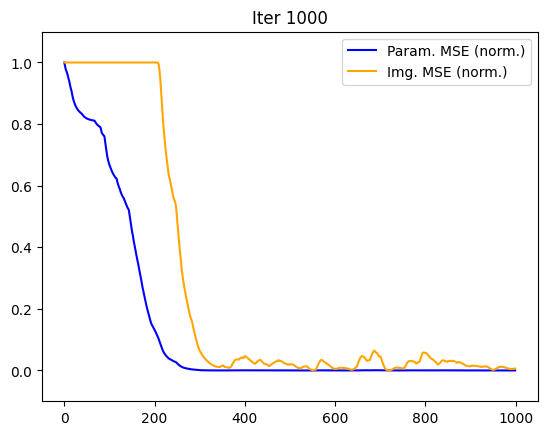

In [11]:
show_with_error(init_img, ref_img, iter=0)
# plt.rcParams['figure.figsize'] = (12, 6)

# set up smoothed renderer
get_smoothed_loss = smoothFn(render_smooth,
                             context_args=None,
                             device=ctx_args['device'])

img_errors, param_errors = [], []

# run optimization
for j in range(hparams['epochs']):
    optim.zero_grad()

    loss, _ = get_smoothed_loss(theta.unsqueeze(0), ctx_args)
    loss.backward()

    optim.step()

    # sigma scheduling:
    # if j > hparams['anneal_const_first'] and hparams['sigma_annealing'] and sigma >= hparams['anneal_sigma_min']:
    #     sigma = run_scheduler_step(sigma, curr_iter=j+1, sigma_initial=hparams['sigma'], sigma_min=hparams['anneal_sigma_min'], 
    #                                n=hparams['epochs'], const_first_n=hparams['anneal_const_first'], const_last_n=hparams['anneal_const_last'])
    #     ctx_args['sigma'] = sigma
    
    # plotting, logging, printing...
    img_curr = get_rendering(theta)
    img_loss = torch.nn.MSELoss()(img_curr, ref_img).item()
    param_loss = torch.nn.MSELoss()(theta, gt_theta).item()
    img_errors.append(img_loss)
    param_errors.append(param_loss)

    if (j+1) % 25 == 0: 
      print(f"Iter {j+1}/{hparams['epochs']} - Img.Loss: {img_loss:.4f} - Param.Loss: {param_loss:.4f}")

    if (j+1) % 50 == 0: 
      show_with_error(img_curr, ref_img, iter=j+1)
      plt_errors(img_errors, param_errors, title=f'Iter {j+1}')